In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import RNA
from IPython.display import SVG
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from RNA_helper import replace_char_towards_optimal, move_to_optimal, get_initial_guess, get_puzzle, secundary_structures_metric
from environment import RNAInvEnvironment

In [212]:
df_eterna_100 = pd.read_csv('eterna100-puzzles.txt', delimiter='\t')

In [215]:
df_eterna_100['lengths'] = df_eterna_100['Secondary Structure'].apply(len)

In [244]:
df_eterna_100[df_eterna_100['lengths'] > 200].sort_values('Solvers')

,Puzzle #,Puzzle Name,Eterna ID,Author,Secondary Structure,Solvers,Sample Solution (1),Sample Solution (2),lengths
99,100,Teslagon,6050904,wawan151,......((.......((.((.......((.((.................,0,None,None,382
98,99,Shooting Star,913357,Brourd,(((((((((((((((((...(.(..((.(((.(((.((....).))...,2,UAUCGCCCCCGUGACAUAAAGAGUGCCGUGGACCGACCGAAAGCGC...,CUAUAUUCCCGUGUUCCAAGGAUUGAAGUGGACCGACCGAAAGCGC...,364
97,98,Bullseye,965280,hoglahoo,...(((((((...))))..((((...))))..((((...)))))))...,3,AAAGUCGGAUAAAGUCCAAGUAUAAAGUGCAAGUCCAAAGGAUGAC...,AAAGCCGAGGAAACCUCAAGUAUAAAGUACAACCUAAAAUAGGGGC...,202
96,97,Hoglafractal,1632102,hoglahoo,..(.((..(((((....(((((......))))))))))((((...(...,3,ACGUCCAAGACUAAAAUGUUAUGAAAAAAUGAUUGGUUGGAGAAAU...,ACGUCCAAUAGAUAAAAUGUAUGAAAAAAUAUAGUCUACAUCAAAU...,400
95,96,Cesspool,911841,hoglahoo,(..(..(....)..(((..(.(.(((...)))..)..)..)))..(...,4,GUGGAAGGAAACAAGAUUGGAGAGGCAAAGCCGGCGGCUGGUUAAU...,GUGCAAGGAAACAAGACUGCACACAUAAAAUGGGGGGGUGGUCAAG...,358
93,94,Looking Back Again,726696,Brourd,(((..(((((((.....((((((...)))))).))))..((((((....,6,UCCAAUCGGUAUAAAAAUGUGAUAAAAUUAUAGGUACAACUCGCUA...,GCCAAGGUGUAAGAAAGAAUUAUAAAGUGAUUAUUACAAGAAGGUA...,389
90,91,Thunderbolt,908660,Quasispecies,((..(((((........(.((..((.(.....(....).(((((((...,11,AUUGAUUAUAAAAAAAAAGACUGGUGUAAAAAAGAAAUAAUUAUAA...,GUUGGUAUAAAAAAAAAUGGUUGAUGAAAAAAAGAAAUAGUAUAUA...,392
89,90,Gladius,944766,Quasispecies,(....)..(....(...(..(.(..(...(((.(((...((((......,11,CGAAAGAAGAAAGGAAGGUGCGUUGAAAGAGAAUGCAAAAUUAGAA...,GGAAACAACAAAGCGAAUUGAGAUGAGAAUACAGUCAAAUUUAGAA...,400
85,86,Methaqualone C16H14N2O Structural Representation,4891834,Malcolm,.......((((.((((.(((.(((....))).(((.(((....)))...,14,AAAAAAACCCCAGGGCAGGCAGGGAAAACCCAGGGAGGGAAAACCC...,AAAAAAAUUACAGUACAGCCAGUUGAAAAACAGACAGUAGAAAUAC...,355
84,85,Snowflake Necklace ( or v2.0 ),624517,Wobble Dynx,(((((((((((((((.(((((.((.....)).((.....)).((.....,15,GCGCGGCCCGCCCCCACCCCCAGGGAAAACCAGGGAAAACCACCGA...,AUAAUUAUAAUAAUAAGUAUCAGGGAAAACCAGGGAAAACCACCGA...,389


In [222]:
df_eterna_100.sort_values('lengths', ascending=False).head(-20)

,Puzzle #,Puzzle Name,Eterna ID,Author,Secondary Structure,Solvers,Sample Solution (1),Sample Solution (2),lengths
62,63,Fractal star x5,3676828,Crul,.....((((((((..((((....))))..((((....))))..(((...,36,AAAAAGGGUGUGAAAUAAGAAAACUUAAAUUAGGAAACUAAAAUUU...,AAAAAUAUAUAUAAAAUUUGAAAGGAUAAUAAUGAAAGUUAAAUAU...,400
52,53,Documenting repetitious behavior,3194980,paramodic,.......((.........((.........((.........((.......,51,AAAAAAAGGAAAAAAAAAGGAAAAAAAAGCCGAAAAAAAAGGAAAA...,AAAAAAACGGAAAAAAAAGGAAAAAAAAAGGAAAAAAAAAGCAAAA...,400
96,97,Hoglafractal,1632102,hoglahoo,..(.((..(((((....(((((......))))))))))((((...(...,3,ACGUCCAAGACUAAAAUGUUAUGAAAAAAUGAUUGGUUGGAGAAAU...,ACGUCCAAUAGAUAAAAUGUAUGAAAAAAUAUAGUCUACAUCAAAU...,400
89,90,Gladius,944766,Quasispecies,(....)..(....(...(..(.(..(...(((.(((...((((......,11,CGAAAGAAGAAAGGAAGGUGCGUUGAAAGAGAAUGCAAAAUUAGAA...,GGAAACAACAAAGCGAAUUGAGAUGAGAAUACAGUCAAAUUUAGAA...,400
21,22,This is ACTUALLY Small And Easy 6,3084759,steven123505,.................................................,136,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,UCACCCACCACCCACCAAACCCAAACAACCAAACUCCCACACACAC...,400
79,80,Spiral of 5's,474410,Brourd,(....(((((...(((((...(((((....(((((...(((((......,21,GGAAUGUGAGAAAGUGUAAAAGUGUAAAAAGUGGGAAAGUGGGAAA...,GAAAUGUGGAGAGGGUGGGAGGGUGGGAAGGGUGAGAGGGUGAGAG...,397
75,76,Snowflake 3,415093,Ding,(((((....)).((((((....)))..((((.((((..(((....)...,23,GGGGGGAAACCAGCGUUGGAAACAAAAGUACAGUACAACUGGAAAC...,CCGCGGAAACGACCGGAUGAAAAUCAAAUCCAGAUCAAUACGAAAG...,393
90,91,Thunderbolt,908660,Quasispecies,((..(((((........(.((..((.(.....(....).(((((((...,11,AUUGAUUAUAAAAAAAAAGACUGGUGUAAAAAAGAAAUAAUUAUAA...,GUUGGUAUAAAAAAAAAUGGUUGAUGAAAAAAAGAAAUAGUAUAUA...,392
93,94,Looking Back Again,726696,Brourd,(((..(((((((.....((((((...)))))).))))..((((((....,6,UCCAAUCGGUAUAAAAAUGUGAUAAAAUUAUAGGUACAACUCGCUA...,GCCAAGGUGUAAGAAAGAAUUAUAAAGUGAUUAUUACAAGAAGGUA...,389
84,85,Snowflake Necklace ( or v2.0 ),624517,Wobble Dynx,(((((((((((((((.(((((.((.....)).((.....)).((.....,15,GCGCGGCCCGCCCCCACCCCCAGGGAAAACCAGGGAAAACCACCGA...,AUAAUUAUAAUAAUAAGUAUCAGGGAAAACCAGGGAAAACCACCGA...,389


In [6]:
# df_eterna_100.to_csv('eterna100-puzzles.csv', index=False)

In [7]:
# 
solved_puzzles = [0, 1, 2, 3, 7, 9, 10, 12, 16, 18, 19, 20, 21, 23, 25, 27, 31, 32, 39, 41, 42, 44, 45, 47, 52, 53, 54, 83, 84]

# Simple Hairpin

In [ ]:
# 52, 31, 27

In [206]:
eterna_id = 20111 # Simple Hairpin
eterna_id = 15819 # Prion Pseudoknot - Difficulty Level 0
# secundary_structure, final_sequence = get_puzzle(eterna_id=eterna_id)
# El 5 parece complicado
secundary_structure, final_sequence = get_puzzle(df_eterna_100, idx=3, solution=1)
len(secundary_structure)

Human Integrated Adenovirus - Difficulty Level 0
((((((((((((((.((((((...........((((((((((((.....((((((((....(((((((((((((........))))))))))....))))))))....))))))....)))))...((((((.......))))))))))............)))))).))))....))))))...))))...
GGGGGGGGGGGGUGAGUGUGGAAAAAAAAAAACCCCGGCGGGGGAAAAAGGCGGGGCAAAAGGGGGGGGGGGGGAAAAAAAACCCCCCCCCCAAAACCCGCCCCAAAAGCCCCCAAAACCGCCAAAGCCCCCAAAAAAAGGGGGCGGGGAAAAAAAAAAAACCGCGCACGCCAAAACCUCCCAAACCCCAAA


192

In [209]:
print(secundary_structure)

((((((((((((((.((((((...........((((((((((((.....((((((((....(((((((((((((........))))))))))....))))))))....))))))....)))))...((((((.......))))))))))............)))))).))))....))))))...))))...


In [21]:
RNA.eval_structure_simple(
    final_sequence,
    secundary_structure
)

-154.60000610351562

In [23]:
env = RNAInvEnvironment(secundary_structure)

In [180]:
RNA.eval_structure_simple(
    env.sample_random_action(),
    secundary_structure
)

37.5

In [170]:
RNA.eval_structure_simple(
    get_initial_guess(secundary_structure, bonds_initial_type='low_energy_bonds'),
    secundary_structure
)

188.60000610351562

In [162]:
RNA.eval_structure_simple(
    get_initial_guess(secundary_structure, bonds_initial_type='all_As'),
    secundary_structure
)

All As


286.5

In [27]:
# 99 --> 382
# 98 --> 364
# 84 --> 389

In [10]:
len(secundary_structure)
# 364
# 

389

In [14]:
# start_sequence = get_initial_guess(secundary_structure, bonds_initial_type='all_As')
start_sequence = get_initial_guess(secundary_structure, bonds_initial_type='high_energy_bonds')
# start_sequence = get_initial_guess(secundary_structure, bonds_initial_type='high_energy_bonds')
print(start_sequence)
energies, free_energies, sequences, sec_struct_metric = move_to_optimal(start_sequence, final_sequence, secundary_structure)

high energy bonds pairs list
GGCCGGCGCGCGCGCGCGGCGCCGUAGACCGUGCCCUCAGCCGCAAGGGGCAGGAAGAGCCCGCCCCACGCUCGCCGUGGGAUUCCCCCUGCGCGCGCCCACUGCGCCAGACUGGCCGGCUGCCGUGGCUAUGCCGCCGCAGAGGACGCGCCGGCACUCGGCCAGGCCGUCCCGCGCGGUCGCAUCACGUGCUUCACGCACCCUACGGGCGCGAAAGGCUCGGCCGCCGCAGUCCGGCGGCCGGCCAGGACGGCGCUAAAGGCCCCCCUAUGGUCGGCUACCGACCGACACGGACGGCCCCGGGUUGUCCGGGGCGCACCGAAGAGGGGCGUGGGGCUCCCCGGCGGGCCUUAUCGGCCCGCGUCGGUGCGCCUGCGCGCGCGCCGGCC
Found alternative sequence:60975609756195
GCGCGGCCCGCCCCCACCCCCAGGGAAAACCAGGGAAAACCACCGAAAAGGAGCGAAAAGCCGCGAAAAGCAGGGGGACGGGAAAACCGAGCCGCACCGAACAGGACCGAAAAGGAGGGAAAACCAGCGAAAAGCAGCGAAAAGCAGCGGCAGCCGAAAAGGCACGCGCACCGAAAAGGAGGGAAAACCAGGGAAAACCAGCGAAAAGCAGCGAAAAGCAGCGCGAGGGGAAAACCCAGGGCCACCGAAAAGGACCGAAAAGGAGGGAAAACCAGCGAAAAGCAGCGAAAAGCAGGCCCAGCGGAAAACGCACCGGCAGGGAAAACCAGGGAAAACCACCGAAAAGGAGCGAAAAGCAGCGAAAAGCAGCCGGAGGGGGCGGGCCGCGC
-154.10000610351562

1.0


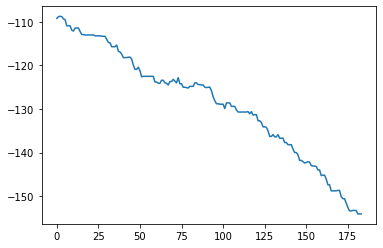

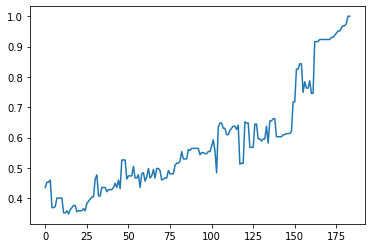

In [15]:
plt.plot(energies)
plt.show()
plt.plot(sec_struct_metric)
plt.show()

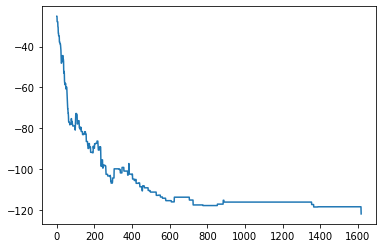

In [413]:
plt.plot(free_energies)
plt.show()

# Shooting Star

In [146]:
Etherna_id = 913357
secundary_structure, final_sequence = get_puzzle_by_id(Etherna_id)

Shooting Star
(((((((((((((((((...(.(..((.(((.(((.((....).))).)))).).)..))..))))))).(((((..(.(..((.(((.(((((.(((.((((.((....).)))).))))).))).)))).).)..))..)(....)..))))(((((((((...))))).(((((...)))))(.(....).).)))).)))).((((.((((...(((((((...))))))).(((((...)))))))))(((((((...))))))).(((((...)))))))))((((..(....)(..(..(..(.(.(((.((((.((....).)))).)))).)..)..).)..))))).)))))).
UAUCGCCCCCGUGACAUAAAGAGUGCCGUGGACCGACCGAAAGCGCGCGCCAGGAGUGCCGGAUGUCACACUCCCUGGACUGGCGAGGACCUGGACAGACCUGACCGAAAGCGCAGCGCUGCGCAGCGCCUGGACUGGCUGGCGAAAGAAGGAGCUCCGCUUAAAAUAAGCACAUACAAAGUAUGGGGGAAACGCAGGAGAGGGGACUGCAGGGGAAAUAUAAAUAAAAUUUAUAAGCUUAAAAUAAGCCCCCCCUUUUAAAAUAAAAGGACCAGGAAACCUGGGCAGGAGCAACGAAAGGUGGUUGUGGAUGAGGACCGGACCGAAAGCGCCGCGCCUGAGGCUGCUCUGCGCUCAGCGAUAA


In [210]:
len(secundary_structure)

192

In [147]:
start_sequence = get_initial_guess(secundary_structure)

In [148]:
energy = RNA.eval_structure_simple(start_sequence, secundary_structure)
energy

57.099998474121094

In [149]:
sec_struct, energy = RNA.fold(start_sequence)
sec_struct

'..((((((((....(((((((.......((((........)))))))))))((((((((...........))))))))....(((((((..((.((.((.(((((((..((((.((((((((...............(((((((((((..........(((((...)))))((((((...)))))).))))))).))))..((((.((((((...((((((((((...))))))))))........(((((((((((....))))))))))))))))).)))).......)).)))))).)))).))))))).)).)).)))))))))...((((..((((...)))).))))..)))))))).'

In [150]:
energy

-125.19999694824219

In [151]:
energies, free_energies, sequences = move_to_optimal(start_sequence, final_sequence, secundary_structure, calc_free_energy=True)

KeyboardInterrupt: 

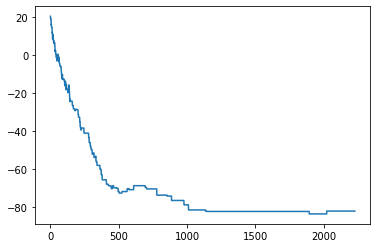

In [133]:
plt.plot(energies)
plt.show()

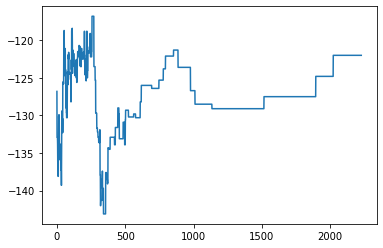

In [134]:
plt.plot(free_energies)
plt.show()